In [80]:
import numpy as np
from CGN import solve_cgn
import matplotlib.pyplot as plt

In [81]:
def generate_spd_matrix(n, kappa): # n by n matrix, condition number kappa
    evals = np.logspace(0, np.log10(kappa), n)
    Q, _ = np.linalg.qr(np.random.randn(n,n)) # this should make a random orthogonal matrix
    A = Q @ np.diag(evals) @ Q.T # def of eigendecomposition 
    return A

In [82]:
N = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
kappa = [1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9]

matrices = {}

for NN in N:
    matrices[NN] = {}
    for kk in kappa:
        matrices[NN][kk] = generate_spd_matrix(NN, kk)

In [83]:
res = {}

dim = 2
while True:
    if dim > 1024:
        break

    b = np.random.rand(dim, )

    res[dim] = {}

    for key in matrices[dim]:
        res[dim][key] = solve_cgn(matrices[dim][key], b)[:2]
    
    dim *= 2

Iteration: 99600 	 Error: 10.724119373084
Iteration: 99700 	 Error: 10.723839991340775
Iteration: 99800 	 Error: 10.723640299538816
Iteration: 99900 	 Error: 10.723065456059132
CGN did not converge within 100000 iterations  :(


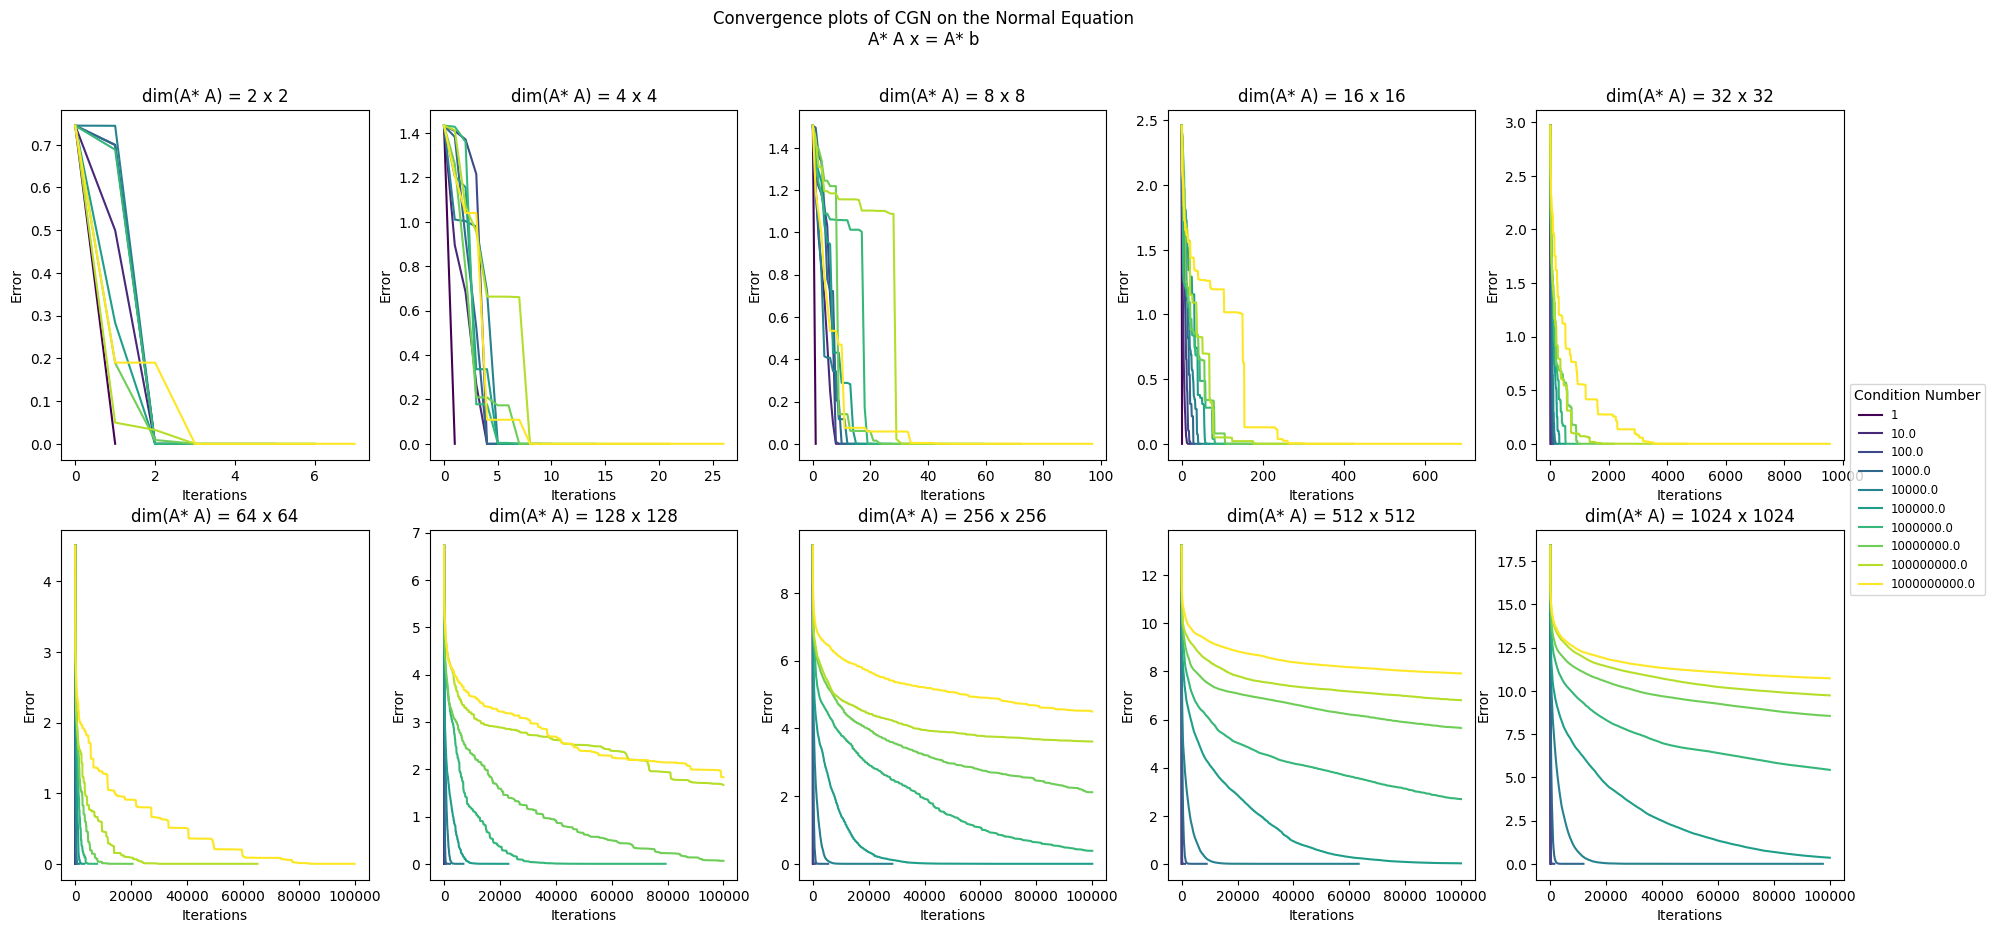

In [84]:
colors = plt.cm.viridis(np.linspace(0, 1, len(kappa)))  # Create a colormap

fig, ax = plt.subplots(2, 5, figsize=(23, 10))

for i, dim in enumerate([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]):
    row, col = divmod(i, 5)
    for j, kk in enumerate(kappa):
        ax[row, col].plot(res[dim][kk][1], label=f'{kk}' if i == 0 else "", color=colors[j])
    ax[row, col].set_title(f"dim(A* A) = {dim} x {dim}")
    ax[row, col].set_xlabel('Iterations')
    ax[row, col].set_ylabel('Error')

fig.suptitle('Convergence plots of CGN on the Normal Equation\nA* A x = A* b')
fig.legend(bbox_to_anchor=(0.9, 0.5), loc='center left', fontsize='small', title="Condition Number")
